# 5. Statistics
- Statistics refers to the mathematics and techniques with which we understand data.
- It is a rich, enormous field, more suited to a shelf (or room) in a library rather than a chapter in a book

## **Describing a Single Set of Data**
- VP of Fundraising asks you for some sort of description of how many friends your members have.

In [8]:
from collections import Counter 
from linear_algebra import sum_of_squares, dot 
import math 
from operator import add

In [9]:
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [10]:
def make_friend_counts_histogram(plt):  
    friend_counts = Counter(num_friends) 
    xs = range(101)  
    ys = [friend_counts[x] for x in xs]   
    plt.bar(xs, ys)  
    plt.axis([0,101,0,25])    
    plt.title("Histogram of Friend Counts")
    plt.xlabel("# of friends") 
    plt.ylabel("# of people")  
    plt.show()

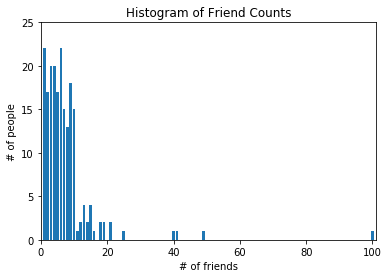

In [11]:
import matplotlib.pyplot as plt
make_friend_counts_histogram(plt)

- Unfortunately, this chart is still too difficult to slip into conversations. 
- So you start generating some statistics. 
- Probably the simplest statistic is simply the number of data points:

**min, max, smallest, largest**

In [12]:
num_points = len(num_friends)               # 204

largest_value = max(num_friends)            # 100 smallest_value = min(num_friends)           # 1
sorted_values = sorted(num_friends)

smallest_value = sorted_values[0]           # 1 
second_smallest_value = sorted_values[1]    # 1 
second_largest_value = sorted_values[-2]    # 49

print("num_points", len(num_friends)) 
print("largest value", max(num_friends)) 
print("smallest value", min(num_friends))
print("second_smallest_value", sorted_values[1])
print("second_largest_value", sorted_values[-2]  )

num_points 204
largest value 100.0
smallest value 1
second_smallest_value 1
second_largest_value 49


### **numpy version**

In [13]:
import numpy as np

num_friends = np.array(num_friends)

num_points = num_friends.shape[0] # 204

largest_value = np.max(num_friends) # 100
smallest_value = np.min(num_friends) # 1

sorted_values = np.sort(num_friends)
smallest_value = sorted_values[0] # 1
second_smallest_value = sorted_values[1] # 1
second_largest_value = sorted_values[-2] # 49

print("num_points", len(num_friends))
print("largest value", max(num_friends))
print("smallest value", min(num_friends))
print("second_smallest_value", sorted_values[1])
print("second_largest_value", sorted_values[-2] )

num_friends = list(num_friends)

num_points 204
largest value 100.0
smallest value 1.0
second_smallest_value 1.0
second_largest_value 49.0


# Central Tendencies
- The median doesn’t depend on every value in your data. #중간값은 모든 데이터에 의존하지 않는다
- For example, if you make the largest point larger (or the smallest point smaller), the middle points remain unchanged.
- the mean is very sensitive to outliers in our data.    #평균은 스파크값에 민감하다
- If our friendliest user had 200 friends (instead of 100), then the mean would rise to 7.82, while the median would stay the same
- For example, the story is often told that in the mid-1980s, the major at the University of North Carolina with the highest average starting salary was geography, mostly on account of NBA star (and outlier) Michael Jordan.
- A generalization of the median is the quantile, which represents the value less than which a certain percentile of the data lies. (The median represents the value less than which 50% of the data lies.) #분위수 퍼센트
- mode: most-common value                                #최빈값

**mean, median, quantile, mode**

In [14]:
def mean(x):
    return sum(x) / len(x)
def median(v):
    """finds the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    if n % 2 == 1:
         # if odd, return the middle value
        return sorted_v[midpoint]
    else:
         # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
def quantile(x, p):
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]
def mode(x):
    """"returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

In [15]:
print("mean(num_friends)", mean(num_friends))
print("median(num_friends)", median(num_friends))
print("quantile(num_friends, 0.10)", quantile(num_friends, 0.10))
print("quantile(num_friends, 0.25)", quantile(num_friends, 0.25))
print("quantile(num_friends, 0.75)", quantile(num_friends, 0.75))
print("quantile(num_friends, 0.90)", quantile(num_friends, 0.90))
print("mode(num_friends)", mode(num_friends))

mean(num_friends) 7.333333333333333
median(num_friends) 6.0
quantile(num_friends, 0.10) 1.0
quantile(num_friends, 0.25) 3.0
quantile(num_friends, 0.75) 9.0
quantile(num_friends, 0.90) 13.0
mode(num_friends) [6.0, 1.0]


### **numpy version**

In [16]:
import numpy as np
# np.quantile is available from v1.16
# np.percentile uses percent instead of ratio
print("mean(num_friends)", np.mean(num_friends))
print("median(num_friends)", np.median(num_friends))
print("quantile(num_friends, 0.10)", np.percentile(num_friends, 10))
print("quantile(num_friends, 0.25)", np.percentile(num_friends, 25))
print("quantile(num_friends, 0.75)", np.percentile(num_friends, 75))
print("quantile(num_friends, 0.90)", np.percentile(num_friends, 90))
# mode using numpy will be a homework

mean(num_friends) 7.333333333333333
median(num_friends) 6.0
quantile(num_friends, 0.10) 1.0
quantile(num_friends, 0.25) 3.0
quantile(num_friends, 0.75) 9.0
quantile(num_friends, 0.90) 13.0


## Disperson # 산포도
- Dispersion refers to measures of how spread out our data is.
- **Range** is just the difference between the largest and smallest elements # 최대와 최소차이
- **variance** #분산
- Standard deviation #표준편차
- Both the range and the standard deviation have the same **outlier problem**
- **Interquartile_range**: the difference between the 75th percentile value and the 25th percentile value #IQR

In [17]:
# "range" already means something in Python, so we'll use a different name
def data_range(x):
    return max(x) - min(x)
def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]
def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)
def standard_deviation(x):
    return math.sqrt(variance(x))
def interquartile_range(x): # 75% -25% 많은 부분
    return quantile(x, 0.75) - quantile(x, 0.25)

In [18]:
print("data_range(num_friends)", data_range(num_friends))
print("variance(num_friends)", variance(num_friends))
print("standard_deviation(num_friends)", standard_deviation(num_friends))
print("interquartile_range(num_friends)", interquartile_range(num_friends))

data_range(num_friends) 99.0
variance(num_friends) 81.54351395730716
standard_deviation(num_friends) 9.03014473623248
interquartile_range(num_friends) 6.0


### **numpy version**

In [19]:
num_friends = np.array(num_friends)
print("data_range(num_friends)", np.ptp(num_friends)) # peak to peak 최대 최소차
print("data_range(num_friends)", np.max(num_friends) - np.min(num_friends))
print("variance(num_friends)", np.var(num_friends, ddof=1)) # DEGRRE OF 샘플 평균 모집단평균일때 0 샘플 평균일때 N
print("standard_deviation(num_friends)", np.std(num_friends, ddof=1))
q75, q25 = np.percentile(num_friends, [75 ,25])
print("interquartile_range(num_friends)", q75 - q25)
num_friends = list(num_friends)

data_range(num_friends) 99.0
data_range(num_friends) 99.0
variance(num_friends) 81.54351395730707
standard_deviation(num_friends) 9.030144736232474
interquartile_range(num_friends) 6.0


## Boxplot
- it is very explanatory
- It shows the summary of data

<img src="picture/le5.png">

- In case of normal distribution

<img src="picture/le5-2.png">

<img src="picture/le5-3.png">

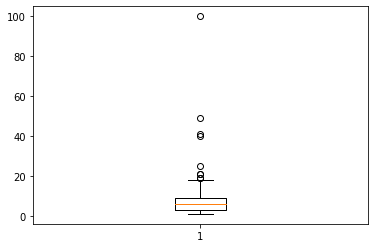

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.boxplot(num_friends)
plt.show()

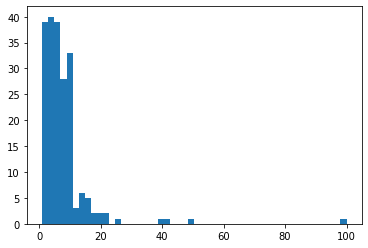

In [21]:
plt.hist(num_friends, bins=50)
plt.show()

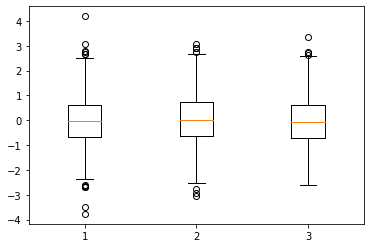

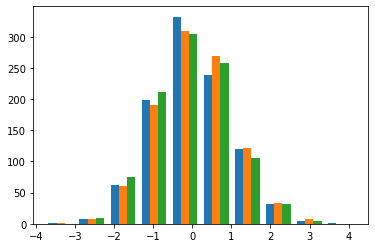

In [22]:
data = np.random.randn(1000,3)
plt.boxplot(data)
plt.show()
plt.hist(data, bins=10)
plt.show()

If we know the population mean, the standard deviation is given by
$$\sigma = \sqrt{\sum_(x-\mu)^2\over n}$$
If we don’t know the population mean, we can use sample mean to calculate the standard deviation.
$$\sigma = \sqrt{\sum_(x-\bar x)^2\over n-1}$$

In [23]:
import numpy as np #두변수의 사이의 관계가 궁금하다 연관성!
print(np.std([1,2,3]))
print(np.std([1,2,3], ddof=1)) # provide degree of freedom 
print(standard_deviation([1,2,3]))

0.816496580927726
1.0
1.0


## Correlation
-DataSciencester’s VP of Growth has a theory that the amount of time people spend on the site is
related to the number of friends they have on the site, and she’s asked you to verify this.  
-We’d like to investigate the relationship between these two metrics.


- Whereas variance measures how a single variable deviates from its mean, covariance measures how two
variables vary in tandem from their means.
- It’s hard to interpret what a “large” covariance is unless it is normalized.
- Correlation: covariance divided by the standard deviations of both variables
- The correlation is unitless and always lies between -1 (perfect anti-correlation) and 1 (perfect correlation).

<img src="picture/le5-4.png">

<img src="picture/le5-5.png">

In [25]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,
                 34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,
                 28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,
                 31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,
                 30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,
                 18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,
                 31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,
                 24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,
                 32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,
                 39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,
                 39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,
                 27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,
                 22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,
                 35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,
                 29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,
                 27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,
                 34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,
                 15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)
def correlation(x, y): # 0.7이상 관계있다
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero

In [26]:
print(covariance(num_friends, daily_minutes)) # 22.43
print(correlation(num_friends, daily_minutes)) # 0.25
# we may conclude that two variables are less correlated

22.425435139573064
0.24736957366478218


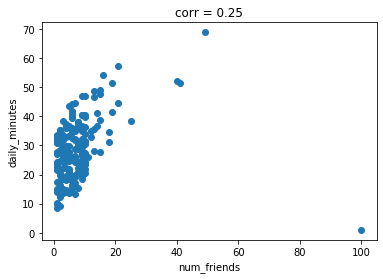

In [27]:
plt.scatter(num_friends, daily_minutes)
plt.xlabel('num_friends')
plt.ylabel('daily_minutes')
plt.title('corr = {:.2}'.format(correlation(num_friends, daily_minutes)))
plt.show() #상간관계 없다

Remove outliers whose index is 0

- It turns out that the outlier is a test data in a database, which is a **garbage**
- Recall **"GIGO: Garbage in, garbage out"**

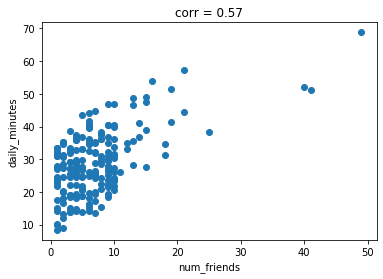

In [28]:
plt.scatter(num_friends[1:], daily_minutes[1:])
#plt.scatter(num_friends[4:], daily_minutes[4:])
plt.xlabel('num_friends')
plt.ylabel('daily_minutes')
plt.title('corr = {:.2}'.format(correlation(num_friends[1:], daily_minutes[1:])))
plt.show() #꾀 관련성이 있다

Correlation in Plain English
- Exactly –1. A perfect downhill (negative) linear relationship
- -0.70. A strong downhill (negative) linear relationship
- -0.50. A moderate downhill (negative) relationship
- -0.30. A weak downhill (negative) linear relationship
- 0. No linear relationship
- +0.30. A weak uphill (positive) linear relationship
- +0.50. A moderate uphill (positive) relationship
- +0.70. A strong uphill (positive) linear relationship
- Exactly +1. A perfect uphill (positive) linear relationship

Correlation vs Cosine similarity
$$corr(x,y) = cosine(x-\bar x, y - \bar y)$$


## **numpy version**
- np.cov returns covariance matrix: diagonal is a variance of a variable
- np.corrcoef returns correlation matrix: diagnol is always 1
- You can get 𝑛 × 𝑛 covariance matrix

In [21]:
num_friends = np.array(num_friends)
daily_minutes = np.array(daily_minutes)
data = np.array([num_friends, daily_minutes])
print(data.shape)
print()
print(np.cov(data)) #분산 공분산 MATRIX
print(np.corrcoef(data))
print()
print(np.corrcoef(data)[0,1])
print()
# print(np.var(num_friends, ddof=1))
# print(np.var(daily_minutes, ddof=1))
num_friends = list(num_friends)
daily_minutes = list(daily_minutes)

(2, 204)

[[ 81.54351396  22.42543514]
 [ 22.42543514 100.78589895]]
[[1.         0.24736957]
 [0.24736957 1.        ]]

0.247369573664782



## Simpson's paradox
- One not uncommon surprise when analyzing data is Simpson’s Paradox, in which correlations can be
misleading when confounding variables are ignored.
|coast|# of members|avg.# of friends|
|------|-----:|-----:|
|West Coast|101|8.2|
|East Coast|103|6.5|

$$ West가 사교성이 더 좋다 > 옳지 않아 $$

- West Coast data scientists are friendlier than the East Coast data scientists
- Why?
- Actually, if introduce one more variable, the correlation goes in the opposite direction!

|coast |degree |# of members |avg. # of friends
|--------|-----|-----:|-----:|
|West Coast |PhD| 35 |3.1|
|East Coast |PhD |70 |3.2|
|West Coast| no PhD |66 |10.9|
|East Coast |no PhD| 33| 13.4|

$$동부가 사교성이 더 좋다 $$
$$EAST에 박사학위가 너무 많다 sampling이 잘못됐다$$
$$위의 데이터는 degree의 영향이 사라짐$$

- The only real way to avoid this is by knowing your data and by doing what you can to make sure you’ve
checked for possible confounding factors.
- Obviously, this is not always possible.
- **Visualization of Simpson's paradox on data resembling real-world variability indicates that risk of
misjudgement of true relationship can indeed be hard to spot**
- overall: strong negative correlation: -0.74
- individual: strong postive correlation: +0.74, +0.82 +0.75 +0.72 +0.69
<img src ="picture/le5-6.png">
$$ 다섯개로 나누어서 봐야된다 $$

<img src = "picture/le5-7.png">

## Some Other Correlational Caveats
- A correlation of zero indicates that there is no linear relationship between the two variables

**Related but not captured**

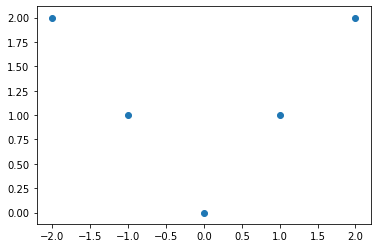

In [29]:
#  absolute value relationship  V절대값이 의미가 있는거 
x = [-2, -1, 0, 1, 2]
y = [ 2, 1, 0, 1, 2]
plt.scatter(x, y)
plt.show()

**How important or how interesting the correlation is?**

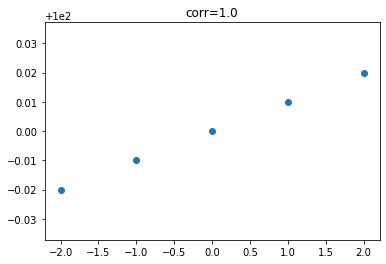

In [30]:
# x축과 y축의 스케일이 다르다
x = [-2, -1, 0, 1, 2]
y = [99.98, 99.99, 100, 100.01, 100.02]
plt.scatter(x, y)
plt.title('corr={:.2}'.format(correlation(x,y)))
plt.show()

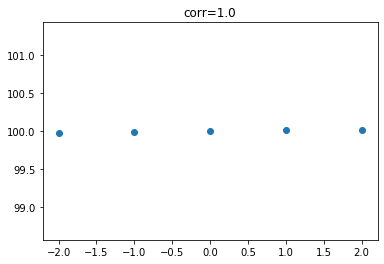

In [23]:
# Perfectly correlated. This relationship isn’t all that interesting.
x = [-2, -1, 0, 1, 2]
y = [99.98, 99.99, 100, 100.01, 100.02]
plt.scatter(x, y)
plt.axis('equal')
plt.title('corr={:.2}'.format(correlation(x,y)))
plt.show()

## Correlation and Causation
상관관계와 인과관계 혼동 x 상관관계다

**-“Correlation is not causation”**
- If x and y are strongly correlated, that might mean
    - that x causes y ,
    - that y causes x ,
    - that each causes the other,
    - that some third factor causes both,
    - or it might mean nothing
- It’s possible that **having more friends on the site** causes DataSciencester users to spend more time on
the site.
- it’s also possible that **the more time you spend arguing in the DataSciencester forums**, the more you
encounter and befriend like-minded people.
- The users who are **most passionate about data science** spend more time on the site (because they find
it more interesting) and more actively collect data science friends (because they don’t want to associate
with anyone else).

조건부 확률로 확인해야한다 ??
ex > frequent item

### **Causation**
- Experiment
- Or explore history data
- Causation may be inferred in terms of conditional probability
- Assocaition rule is a data mining technique to infer a causation


마스크 | 손소독제

비 | 우산